# Predicting Employee Attrition in the Dawn of Recession (Kaggle Competition)

## [Summer Analytics 2020 Capstone Project](https://www.kaggle.com/c/summeranalytics2020/)

This hackathon was organised by [Consulting and Analytics](https://www.facebook.com/caciitg) group of IIT Guwahati as the final assignment/project of their Summer Analytics course. It was my first ever hackathon on Machine Learning and also on kaggle. I'm glad that I secured a **top 10 rank** in this hackathon.

## Overview of the problem statement

As the COVID-19 keeps unleashing its havoc, the world continues to get pushed into the crisis of the great economic recession, more and more companies start to cut down their underperforming employees. Companies firing hundreds and thousands of Employees is a typical headline today. Cutting down employees or reducing an employee salary is a tough decision to take. It needs to be taken with utmost care as imprecision in the identification of employees whose performance is attriting may lead to sabotaging of both employees' career and the company's reputation in the market.

In [1]:
#Importing nescessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#option to display all the columns of the data
pd.set_option('max_columns', None)

In [3]:
#importing training data as pandas dataframe
df = pd.read_csv("hack_train.csv", index_col = "Id")
print("Shape of the dataframe is", df.shape)
df.head()

Shape of the dataframe is (1628, 28)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1,1


In [4]:
#Seeking information about each column viz; number of missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 1 to 1628
Data columns (total 28 columns):
Age                        1628 non-null int64
Attrition                  1628 non-null int64
BusinessTravel             1628 non-null object
Department                 1628 non-null object
DistanceFromHome           1628 non-null int64
Education                  1628 non-null int64
EducationField             1628 non-null object
EmployeeNumber             1628 non-null int64
EnvironmentSatisfaction    1628 non-null int64
Gender                     1628 non-null object
JobInvolvement             1628 non-null int64
JobRole                    1628 non-null object
JobSatisfaction            1628 non-null int64
MaritalStatus              1628 non-null object
MonthlyIncome              1628 non-null int64
NumCompaniesWorked         1628 non-null int64
OverTime                   1628 non-null object
PercentSalaryHike          1628 non-null int64
PerformanceRating          1628 non-null

Our data contains both numerical and categorical features. The features with data type "object" needs to be encoded to numerical data before applying any machine learning algorithm as it deals with only numerical data.

Encoding of object type features can be done using pandas get_dummies.

In [5]:
#Separating target variable Attrition(y) from other features that are to be encoded
y = df['Attrition']
X = df.drop('Attrition', axis=1)

In [6]:
#the variable categ is a list of features which are of 'object' type. Pandas concat is used to concatenate the encoded features
#to the actual data frame
categ = []
for col, value in X.iteritems():
    if value.dtype == 'object':
        categ.append(col)
df_cat = df[categ]
df_cat = pd.get_dummies(df_cat)
df = pd.concat([df, df_cat],  axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1628 entries, 1 to 1628
Data columns (total 56 columns):
Age                                  1628 non-null int64
Attrition                            1628 non-null int64
BusinessTravel                       1628 non-null object
Department                           1628 non-null object
DistanceFromHome                     1628 non-null int64
Education                            1628 non-null int64
EducationField                       1628 non-null object
EmployeeNumber                       1628 non-null int64
EnvironmentSatisfaction              1628 non-null int64
Gender                               1628 non-null object
JobInvolvement                       1628 non-null int64
JobRole                              1628 non-null object
JobSatisfaction                      1628 non-null int64
MaritalStatus                        1628 non-null object
MonthlyIncome                        1628 non-null int64
NumCompaniesWorked              

As it is evident that new encoded features have been added to the dataframe (and are all numeric data) but the original ones are not removed. So we drop those columns.

In [8]:
#Removing the original categorical features
df = df.drop(['JobRole','OverTime','Gender','BusinessTravel','EducationField','Department','MaritalStatus'], axis=1)
print("Shape of the dataframe is", df.shape)
df.head()

Shape of the dataframe is (1628, 49)


,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,30,0,2,3,571,3,3,4,2564,0,14,3,0,12,2,11,7,6,7,4,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
2,36,0,12,4,1614,3,3,3,4663,9,12,3,2,7,2,3,2,1,1,2,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
3,55,1,2,1,842,3,3,4,5160,4,16,3,0,12,3,9,7,7,3,5,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0
4,39,0,24,1,2014,1,3,4,4108,7,13,3,0,18,2,7,7,1,7,4,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
5,37,0,3,3,689,3,3,3,9434,1,15,3,1,10,2,10,7,7,8,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [9]:
#now separating the target variable from the new dataframe
y = df['Attrition']
X = df.drop('Attrition', axis=1)
X.shape, y.shape

((1628, 48), (1628,))

In [10]:
from sklearn.model_selection import train_test_split

## Models to train our data on!

In [11]:
#Importing necessary classifiers from scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [12]:
#Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1139, 48), (1139,), (489, 48), (489,))

### Evaluation Metric

The evaluation metric used for this hackathon is **AUC score under ROC**. AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

### Let us try training our models!! 

The expected output are probablities instead of classes. Hence we must take care of the hyperparameters to set before training the data or use 'predict_proba' command. 

### LOGISTIC REGRESSION

In [14]:
#making an instance of the classifier
model = LogisticRegression()

#fitting the model on train data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

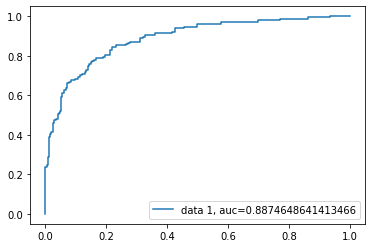

In [15]:
#ROC_AUC score and plotting its curve
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

When the predicted values of test data using this model were submitted it gave a public score of 0.86973 but a private score of 0.79101. This indicates that there were flaws in the training dataset.

Checking for duplicate values in the data:

In [16]:
df.duplicated().sum()

628

628 datapoints were duplicated. We'll remove them and train our model again. This will now give us a more realistic score.

In [17]:
#Deleting duplicates from the dataset
df = df.loc[df.duplicated()==0,:]
print("Shape of the dataframe now is", df.shape)

Shape of the dataframe now is (1000, 49)


In [18]:
#Separation of target variable
y = df['Attrition']
X = df.drop('Attrition', axis=1)
X.shape, y.shape

((1000, 48), (1000,))

In [19]:
#Splitting the data into train and test set after removing duplicate values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=24)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 48), (700,), (300, 48), (300,))

## Training models on cleaned data

### LOGISTIC REGRESSION

In [20]:
#making an instance of the classifier
m1 = LogisticRegression(random_state=24)

#fitting the model on train data
m1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=24, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

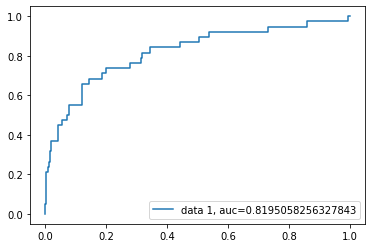

In [21]:
#ROC_AUC score and plotting its curve
y_pred = m1.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This gave a score of around 0.78 on the leaderboard which is an improvement from the previously applied logistic regression model.

### RANDOM FOREST CLASSIFIER

In [22]:
#making an instance of the classifier
m2 = RandomForestRegressor(random_state=24,n_estimators=2000, max_depth=5, min_samples_leaf=6)

#fitting the model on train data
m2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=24, verbose=0,
                      warm_start=False)

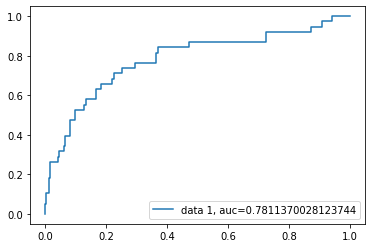

In [23]:
#ROC_AUC score and plotting its curve
y_pred = m2.predict(X_test)

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

After multiple hit and trials on the hyperparameters this model's best score on leaderboard came around 0.756, pretty close to score on training data.

### SUPPORT VECTOR MACHINE

Support Vector Machines are sensitive to normalisation.

In [24]:
#Using MinMaxScaler for normalisation of features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
#making an instance of the classifier
#since we expect probability output we've set the probability hyperparameter to 'True'
m3 = SVC(probability=True, random_state=24)

#fitting the model on train data
m3.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=24,
    shrinking=True, tol=0.001, verbose=False)

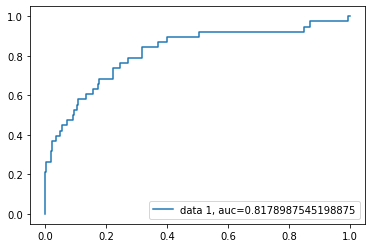

In [26]:
#ROC_AUC score and plotting its curve
y_pred = m3.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The leaderboard score of this model was 0.783. We see that our models give a realistic score on the trained data.

### GRADIENT BOOSTING CLASSIFIER

This classifier model is also sesitive to normalisation.

In [27]:
#normalisation of features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
#making an instance of the classifier
m4 = GradientBoostingClassifier(learning_rate=0.5, max_depth=2, n_estimators=5000, min_samples_leaf=4, random_state=24, 
                                 max_features= 'auto')

#fitting the model on train data
m4.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=2,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=5000,
                           n_iter_no_change=None, presort='auto',
                           random_state=24, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

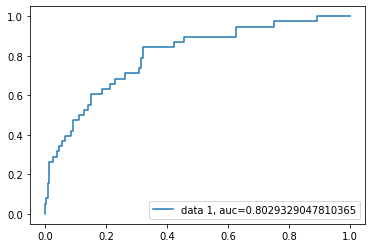

In [29]:
#ROC_AUC score and plotting its curve
y_pred = m4.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

When the training data wasn't dealt with the duplicate cases, it gave the following accuracy score on Gradient Boosting Classifier:

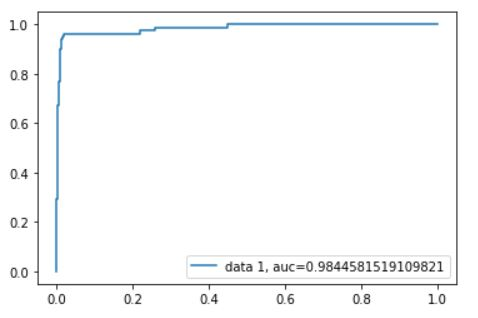

Seeing such high accuracy, without a second thought I submitted this model assuming it to be the best I've obtained but the results were quite dissapointing. The score it gave on leaderboard was 0.8115 which had a great difference from the score on trained model,  which clearly indicated that the model had prior knowledge of the data to test upon. 

## XGBoost

In [30]:
#making an instance of the classifier
m5 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.2, learning_rate = 0.005, subsample = 1, random_state=24,
                max_depth = 15, alpha = 10, n_estimators = 2000, base_score=0.7)

#fitting the model on train data
m5.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.005, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=24, reg_alpha=10,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

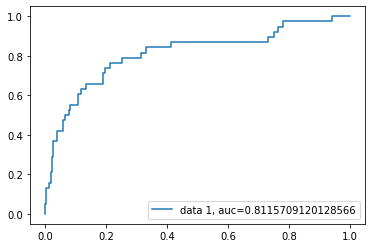

In [31]:
#ROC_AUC score and plotting its curve
y_pred = m5.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

It's score on submission came out to be 0.80

## LightGBM

In [32]:
#making an instance of the classifier
m6 = LGBMClassifier(objective='binary', n_estimators=1500, colsample_bytree=0.35, reg_alpha=0.2,reg_lambda=0.2, 
                        max_depth=2, learning_rate=0.01, random_state=24)

#fitting the model on train data
m6.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.35,
               importance_type='split', learning_rate=0.01, max_depth=2,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1500, n_jobs=-1, num_leaves=31, objective='binary',
               random_state=24, reg_alpha=0.2, reg_lambda=0.2, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

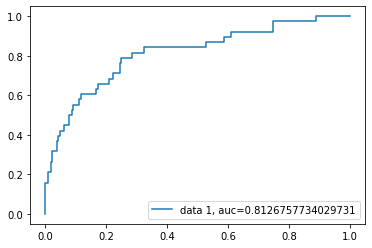

In [33]:
#ROC_AUC score and plotting its curve
y_pred = m6.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

This models's score was also around 0.80 on the leaderboard.

### NEURAL NETWORK (Multilayer Perceptron Classifier)

In [34]:
#making an instance of the classifier
m7 = MLPClassifier(activation='logistic',solver ='lbfgs', max_iter=240, alpha=1, random_state=24)

#fitting the model on train data
m7.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=240, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=24, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

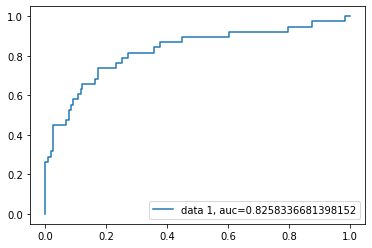

In [35]:
#ROC_AUC score and plotting its curve
y_pred = m7.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The leaderboard score of this model submission was 0.7932

In [36]:
#importing test data as pandas dataframe
dft = pd.read_csv("hack_test.csv", index_col = "Id")
print("Shape of the dataframe is", dft.shape)
dft.head()

Shape of the dataframe is (470, 27)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5,1
2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3,1
3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4,1
4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5,1
5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2,1


In [37]:
dft.duplicated().sum()

0

Our test data doesn't have any duplicated values. We can directly apply our models to it after encoding the categorical fearures in the testdata.

In [38]:
#Encoding similar to train data encoding
tcateg = []
for tcol, tvalue in dft.iteritems():
    if tvalue.dtype == 'object':
        tcateg.append(tcol)
dft_cat = dft[tcateg]
dft_cat = pd.get_dummies(dft_cat)
dft = pd.concat([dft, dft_cat], axis = 1)

In [39]:
#dropping of the 'object' type columns
dft = dft.drop(['JobRole','OverTime','Gender','BusinessTravel','EducationField','Department','MaritalStatus'], axis=1)
dft.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,28,9,3,377,4,3,4,2070,1,23,4,1,5,3,5,2,0,4,5,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,31,6,4,653,1,4,4,5460,4,22,4,2,13,4,7,7,5,7,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
3,37,6,3,474,3,4,1,5974,4,13,3,2,13,2,7,7,6,7,4,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,42,1,2,827,4,2,4,6062,9,13,3,1,8,4,4,3,0,2,5,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
5,45,4,2,972,3,3,2,4447,1,12,3,0,9,5,9,7,0,8,2,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [40]:
#in place of model we'll have m1, m2, ..., m7 depending upon model being applied to it
#also 'predict' might be used for some models instead of 'predict_proba'
dft['Attrition'] = model.predict_proba(dft)[::,1]                    

In [41]:
#Exporting the predicted values as required
dft['Attrition'].to_csv (r'D:\CnA\export_dataframe.csv', index = True, header=True)

### Other things that could have been done

1. Hyperparameter tuning should have been done using GridSearchCV, RandomizedSearchCV or KFold instead of hit and trial each time.
2. The columns which add no value to the target variable should have been removed.
3. Highly correlated features should have been replaced by a single or a couple of features.
4. Many other models could have been applied which might have outperformed some of the models used.